In [1]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import os
from google.colab import drive
import seaborn as sns
import progressbar
import random
import math
import itertools
import copy
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Question 2: Social Network Analysis with the Facebook100 Dataset 
Caltech = nx.read_graphml("/content/drive/MyDrive/fb100/Caltech36.graphml")
MIT = nx.read_graphml("/content/drive/MyDrive/fb100/MIT8.graphml")
JHopking = nx.read_graphml("/content/drive/MyDrive/fb100/Johns Hopkins55.graphml")

In [ ]:
#@title (a) degree distribution
def degDis(G):
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
  plt.hist(degree_sequence, bins='auto')
  #hist, bin_edges = np.histogram(degree_sequence, density=True)
  #plt.semilogy(bin_edges[:-1], hist, 'o', ms=15)
  plt.xlabel(r"$k$, degree ")
  plt.ylabel(r"PDF")
  #plt.ylim(1e-3, 1)
  plt.title("Degree distribution")

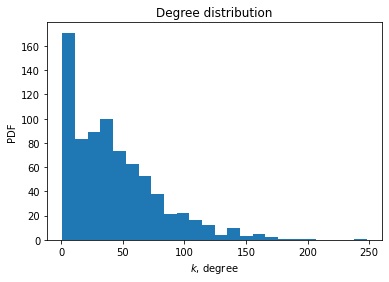

In [ ]:
#@title Caltech
degDis(Caltech)

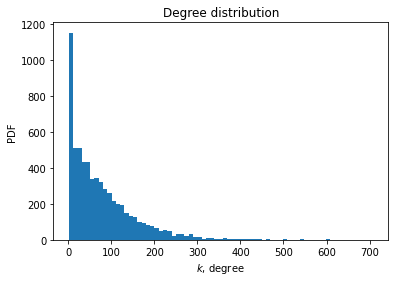

In [ ]:
#@title MIT
degDis(MIT)

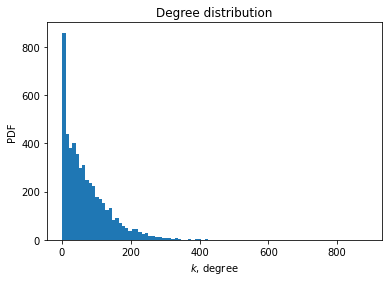

In [ ]:
#@title JHopking
degDis(JHopking)

**Conclusion:** For different schools, the common feature is that the higher the degree, the lower the number of students.

In [ ]:
#@title (b1) global clustering coefficient
print('Caltech: ', nx.transitivity(Caltech))
print('MIT: ', nx.transitivity(MIT))
print('John Hopkins: ', nx.transitivity(JHopking))

Caltech:  0.2912826901150874
MIT:  0.18028845093502427
John Hopkins:  0.19316123901594015


In [ ]:
#@title (b2) mean local clustering coefficient
print('Caltech: ', nx.average_clustering(Caltech))
print('MIT: ', nx.average_clustering(MIT))
print('John Hopkins: ', nx.average_clustering(JHopking))

Caltech:  0.40929439048517247
MIT:  0.2712187419501315
John Hopkins:  0.26839307371293525


In [ ]:
#@title (b3) edge density
print('Caltech: ', nx.density(Caltech))
print('MIT: ', nx.density(MIT))
print('John Hopkins: ', nx.density(JHopking))

Caltech:  0.05640442132639792
MIT:  0.012118119495041378
John Hopkins:  0.013910200162372396


**Answer:** Yes. Because all global clustering coefficient, mean local clustering coefficient and edge density are very low.

In [ ]:
#@title (c) scatter plot
def scatterPlot(G):
  deg = [d for n, d in G.degree()]
  clu = list(nx.clustering(G).values())

  plt.plot(deg, clu, ".");
  plt.xlabel(r"Degree")
  plt.ylabel(r"Local clustering")

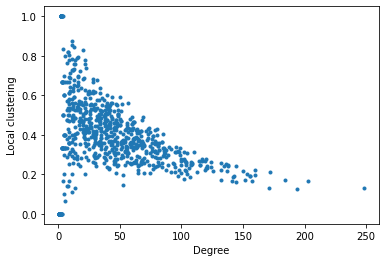

In [ ]:
#@title Caltech
scatterPlot(Caltech)

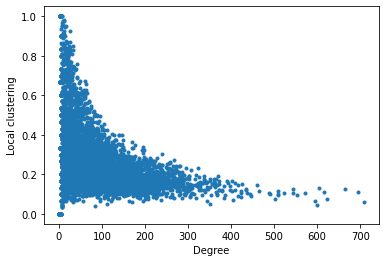

In [ ]:
#@title MIT
scatterPlot(MIT)

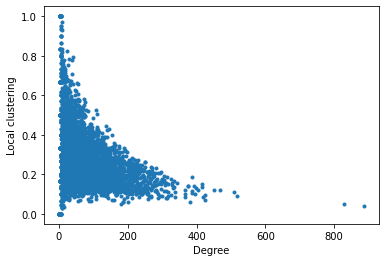

In [ ]:
#@title JHopking
scatterPlot(JHopking)

**Conclusion:** Those with low degrees may have high local clustering coefficients. This is because they may be close friends. A person with a high degree has a low local clustering coefficient, this is because although he has a large social network, the people he knows do not know each other.

In [ ]:
#@title Question 3: Social Network Analysis with the Facebook100 Dataset
G = []
num = 50
import os
fileName = os.listdir('/content/drive/MyDrive/fb100/')
for i in range(num):
  filePath = '/content/drive/MyDrive/fb100/' + fileName[i]
  G.append(nx.read_graphml(filePath))

In [ ]:
def assortativityPolt(item):
  aVal = []
  nSize = []
  for i in range(num):
    aVal.append(nx.attribute_assortativity_coefficient(G[i], item))
    nSize.append(G[i].size())

  plt.xlabel(r"Network Size ")
  plt.ylabel(item + "Assortativity")
  plt.xscale('log')
  plt.axhline(0, color='black')
  plt.plot(nSize, aVal, '.');
  plt.show()

  sns.distplot(aVal,bins="auto",kde_kws={"color":"seagreen", "lw":3 })
  plt.xlabel(item + "Assortativity")
  plt.axvline(0)

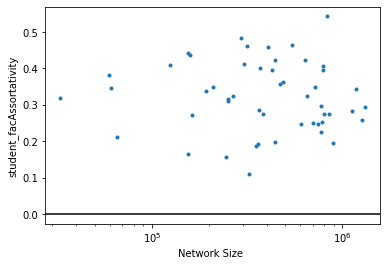

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


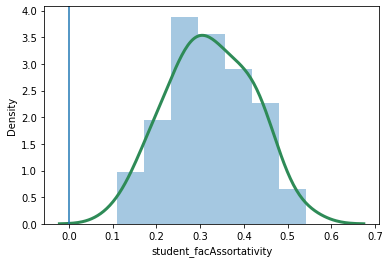

In [ ]:
#@title student/faculty status
assortativityPolt("student_fac")

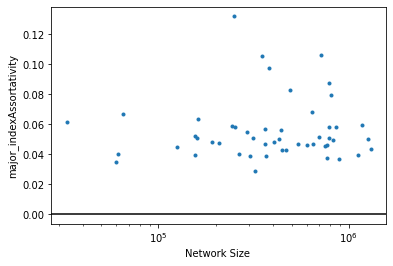

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


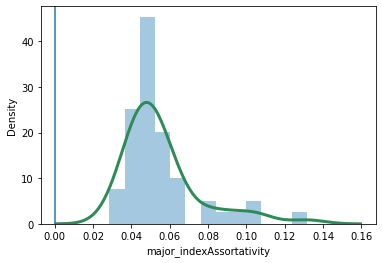

In [ ]:
#@title major
assortativityPolt("major_index")

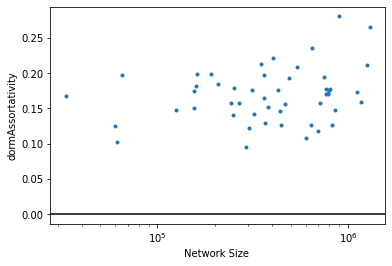

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


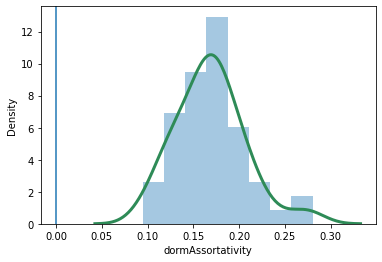

In [ ]:
#@title dorm
assortativityPolt("dorm")

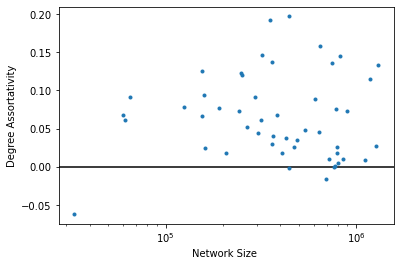

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


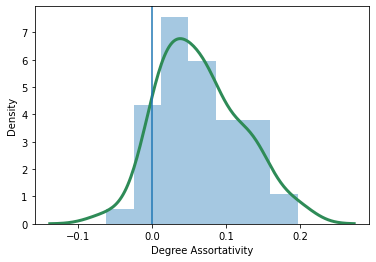

In [ ]:
#@title degree
def assortativityDegPolt():
  aVal = []
  nSize = []
  for i in range(num):
    aVal.append(nx.degree_assortativity_coefficient(G[i]))
    nSize.append(G[i].size())

  plt.xlabel("Network Size ")
  plt.ylabel("Degree Assortativity")
  plt.xscale('log')
  plt.axhline(0, color = "black")
  plt.plot(nSize, aVal, '.');
  plt.show()

  sns.distplot(aVal,bins="auto",kde_kws={"color":"seagreen", "lw":3 })
  plt.xlabel("Degree Assortativity")
  plt.axvline(0)

assortativityDegPolt()

**Conclusion:** among the four factors, student/faculty status has the highest assortativity. This shows that people are more likely to make friends with people in the same state as themselves. In contrast, the assortativities of dormitories and majors are relatively low.

In [ ]:
#@title Question 4: Link prediction
from abc import ABC
from abc import abstractmethod 
class LinkPrediction(ABC):
  def __init__(self, graph):
    self.graph = graph
    self.N = len(graph)
  def neighbors(self, v): 
    neighbors_list = self.graph.neighbors(v)
    return list(neighbors_list)
  def allPairs(self):
    pairs_list = [i for i in itertools.combinations(self.graph.nodes(), 2)]
    return pairs_list
  @abstractmethod 
  def fit(self):
    raise NotImplementedError("Fit must be implemented") 
    
class CommonNeighbors(LinkPrediction):
  def __init__(self, graph):
    super(CommonNeighbors , self).__init__(graph)

  def commNb(self, x, y):
    #lx = self.neighbors(x);
    #ly = self.neighbors(y);
    return len(list(nx.common_neighbors(self.graph, x, y)))
    #return len([i for i in lx if i in ly])

  def predict(self):
    pairs_list = self.allPairs()
    Ep = [self.commNb(i[0], i[1]) for i in pairs_list]
    return Ep

  def fit(self, n):
    Ep = self.predict()
    ap = self.allPairs()
    idx = range(len(ap))
    Ep, idx = zip(*sorted(zip(Ep, idx), reverse = True))
    self.res = [ap[idx[i]] for i in range(n)]
    #self.epn = Ep
    return [ap[i] for i in range(n)]




class Jaccard(LinkPrediction):
  def __init__(self, graph):
    super(Jaccard , self).__init__(graph)

  def Jad(self, x, y):
    #lx = set(self.neighbors(x))
    #ly = set(self.neighbors(y))
    #lx1 = copy.deepcopy(lx)
    #ly1 = copy.deepcopy(ly)
    #gg = copy.deepcopy(self.graph)
    sizei = len(list(nx.common_neighbors(self.graph, x, y)))
    sizeu = len(list(self.graph.neighbors(x))) + len(list(self.graph.neighbors(y))) - sizei

    if sizeu == 0:
      return 0

    return sizei / sizeu

  def predict(self):
    pairs_list = self.allPairs()
    Ep = [self.Jad(i[0], i[1]) for i in pairs_list]
    return Ep

  def fit(self, n):
    Ep = self.predict()
    ap = self.allPairs()
    idx = range(len(ap))
    Ep, idx = zip(*sorted(zip(Ep, idx), reverse = True))
    self.res = [ap[idx[i]] for i in range(n)]
    #self.epn = Ep
    return [ap[i] for i in range(n)]



class Ada(LinkPrediction):
  def __init__(self, graph):
    super(Ada , self).__init__(graph)

  def Ad(self, x, y):
    #lx = self.neighbors(x);
    #ly = self.neighbors(y);
    iset = list(nx.common_neighbors(self.graph, x, y))
    return sum([1.0/math.log(len(self.neighbors(i)), 10) for i in iset])

  def predict(self):
    pairs_list = self.allPairs()
    Ep = [self.Ad(i[0], i[1]) for i in pairs_list]
    return Ep

  def fit(self, n):
    Ep = self.predict()
    ap = self.allPairs()
    idx = range(len(ap))
    Ep, idx = zip(*sorted(zip(Ep, idx), reverse = True))
    self.res = [ap[idx[i]] for i in range(n)]
    #self.epn = Ep
    return [ap[i] for i in range(n)]

In [ ]:
def evaluate(G, frac, topN):
  num = int(len(G.edges())*frac)
  Erem = random.sample(G.edges(), num)
  newG = G
  newG.remove_edges_from(Erem)
  
  
  lp1 = CommonNeighbors(newG)
  lp1.fit(topN)
  lp2 = Jaccard(newG)
  lp2.fit(topN)
  lp3 = Ada(newG)
  lp3.fit(topN)
  
  Epred1 = lp1.res
  Epred2 = lp2.res
  Epred3 = lp3.res

  print("Common Neighbors: " + str(len(list(set(Erem).intersection(set(Epred1))))))
  print("Jaccard: " + str(len(list(set(Erem).intersection(set(Epred2))))))
  print("Adamic/Adar: " + str(len(list(set(Erem).intersection(set(Epred3))))))

In [ ]:
Caltech = nx.read_graphml("/content/drive/MyDrive/fb100/Caltech36.graphml")
Simmons = nx.read_graphml("/content/drive/MyDrive/fb100/Simmons81.graphml")
Reed = nx.read_graphml("/content/drive/MyDrive/fb100/Reed98.graphml")

In [ ]:
def showEva(G, tn):
  print("\n Fraction = 0.05: ")
  evaluate(G, 0.05, tn)
  print("\n Fraction = 0.10: ")
  evaluate(G, 0.10, tn)
  print("\n Fraction = 0.15: ")
  evaluate(G, 0.15, tn)
  print("\n Fraction = 0.20: ")
  evaluate(G, 0.20, tn)

In [ ]:
showEva(Caltech, 10000)


 Fraction = 0.05: 
Common Neighbors: 340
Jaccard: 327
Adamic/Adar: 344

 Fraction = 0.10: 
Common Neighbors: 650
Jaccard: 647
Adamic/Adar: 658

 Fraction = 0.15: 
Common Neighbors: 884
Jaccard: 823
Adamic/Adar: 884

 Fraction = 0.20: 
Common Neighbors: 902
Jaccard: 859
Adamic/Adar: 945


In [ ]:
showEva(Simmons, 10000)


 Fraction = 0.05: 
Common Neighbors: 329
Jaccard: 266
Adamic/Adar: 343

 Fraction = 0.10: 
Common Neighbors: 599
Jaccard: 469
Adamic/Adar: 611

 Fraction = 0.15: 
Common Neighbors: 815
Jaccard: 615
Adamic/Adar: 838

 Fraction = 0.20: 
Common Neighbors: 918
Jaccard: 609
Adamic/Adar: 952


In [ ]:
showEva(Reed, 10000)


 Fraction = 0.05: 
Common Neighbors: 283
Jaccard: 316
Adamic/Adar: 289

 Fraction = 0.10: 
Common Neighbors: 506
Jaccard: 576
Adamic/Adar: 520

 Fraction = 0.15: 
Common Neighbors: 656
Jaccard: 709
Adamic/Adar: 678

 Fraction = 0.20: 
Common Neighbors: 695
Jaccard: 688
Adamic/Adar: 723


**Conclusion:** All three methods can effectively predict links. However, the performance of the three methods differs on different datasets. This indicates that different methods are applicable to different datasets.

In [4]:
#@title Question 5: Find missing labels with the label propagation algorithms

def preprocessing(G, attr, frac):
  labelVal = nx.get_node_attributes(G,attr)
  labelType = list(set(val for dic in labelVal for val in labelVal.values()))
  if 0 in labelType:
    labelType.remove(0)
  Nlabel = len(labelType)

  A = nx.to_numpy_array(G)
  A = np.array(A, dtype = np.float64)
  D = np.diag(np.sum(A, axis=0))
  P = np.dot(np.linalg.inv(D),A)

  Nnum = len(G.nodes())
  Rnum = int(Nnum*frac)
  Nrem = random.sample(range(Nnum), Rnum)

  Y = np.zeros((Nnum, Nlabel))
  groundTruth = np.zeros((Nnum, Nlabel))

  for i in range(Nnum):
    lv = labelVal[str(i)]
    if lv == 0:
      continue
    
    idx = labelType.index(lv)
    groundTruth[i,idx] = 1
    if i in Nrem:
      continue
    
    P[i] = np.zeros(Nnum)
    P[i,i] = 1
    Y[i,idx] = 1


  return P, Y, Nrem, groundTruth


In [5]:
def LPZhu(G, P, Y0):
  Y = Y0.copy()
  dif = 1000
  for i in range(1000):
  #while dif > 0.001:
    Yold = Y.copy()
    Y = np.dot(P, Yold)
    dif = np.abs(np.sum(Y - Yold))
  return Y

In [4]:
Duke = nx.read_graphml("/content/drive/MyDrive/fb100/Duke14.graphml")

In [8]:
def eva(G, attr, frac):
  P, Y0, Nrem, groundTruth = preprocessing(G, attr, frac)
  Y = LPZhu(G, P, Y0)

  cnt = 0
  tot = 0
  for i in Nrem:
    if np.max(groundTruth[i]) == 0:
      continue
    if np.argmax(groundTruth[i]) == np.argmax(Y[i]):
      cnt += 1
    tot += 1
  return cnt/tot

In [15]:
#@title (1) Duke
r1 = eva(Duke, 'gender', 0.1)
r2 = eva(Duke, 'gender', 0.2)
r3 = eva(Duke, 'gender', 0.3)
r4 = eva(Duke, 'gender', 0.4)
print("Gender, frac = 0.1, accuracy = " + str(r1))
print("Gender, frac = 0.2, accuracy = " + str(r2))
print("Gender, frac = 0.3, accuracy = " + str(r3))
print("Gender, frac = 0.4, accuracy = " + str(r4))

Gender, frac = 0.1, accuracy = 0.6923937360178971
Gender, frac = 0.2, accuracy = 0.6916666666666667
Gender, frac = 0.3, accuracy = 0.6798229435632608
Gender, frac = 0.4, accuracy = 0.6777563926312895


In [20]:
r1 = eva(Duke, 'major_index', 0.1)
r2 = eva(Duke, 'major_index', 0.2)
r3 = eva(Duke, 'major_index', 0.3)
r4 = eva(Duke, 'major_index', 0.4)
print("Major, frac = 0.1, accuracy = " + str(r1))
print("Major, frac = 0.2, accuracy = " + str(r2))
print("Major, frac = 0.3, accuracy = " + str(r3))
print("Major, frac = 0.4, accuracy = " + str(r4))

Major, frac = 0.1, accuracy = 0.24489795918367346
Major, frac = 0.2, accuracy = 0.2800503461296413
Major, frac = 0.3, accuracy = 0.2593984962406015
Major, frac = 0.4, accuracy = 0.24763705103969755


In [21]:
r1 = eva(Duke, 'dorm', 0.1)
r2 = eva(Duke, 'dorm', 0.2)
r3 = eva(Duke, 'dorm', 0.3)
r4 = eva(Duke, 'dorm', 0.4)
print("Dorm, frac = 0.1, accuracy = " + str(r1))
print("Dorm, frac = 0.2, accuracy = " + str(r2))
print("Dorm, frac = 0.3, accuracy = " + str(r3))
print("Dorm, frac = 0.4, accuracy = " + str(r4))

Dorm, frac = 0.1, accuracy = 0.5313390313390314
Dorm, frac = 0.2, accuracy = 0.527363184079602
Dorm, frac = 0.3, accuracy = 0.5196032120925839
Dorm, frac = 0.4, accuracy = 0.5146533238027162


In [22]:
r1 = eva(Duke, 'year', 0.1)
r2 = eva(Duke, 'year', 0.2)
r3 = eva(Duke, 'year', 0.3)
r4 = eva(Duke, 'year', 0.4)
print("Year, frac = 0.1, accuracy = " + str(r1))
print("Year, frac = 0.2, accuracy = " + str(r2))
print("Year, frac = 0.3, accuracy = " + str(r3))
print("Year, frac = 0.4, accuracy = " + str(r4))

Year, frac = 0.1, accuracy = 0.9073446327683616
Year, frac = 0.2, accuracy = 0.8965122927387078
Year, frac = 0.3, accuracy = 0.905595736581652
Year, frac = 0.4, accuracy = 0.9026624677927283


In [2]:
Caltech = nx.read_graphml("/content/drive/MyDrive/fb100/Caltech36.graphml")

In [11]:
#@title (2) Caltech
r1 = eva(Caltech, 'gender', 0.1)
r2 = eva(Caltech, 'gender', 0.2)
r3 = eva(Caltech, 'gender', 0.3)
r4 = eva(Caltech, 'gender', 0.4)
print("Gender, frac = 0.1, accuracy = " + str(r1))
print("Gender, frac = 0.2, accuracy = " + str(r2))
print("Gender, frac = 0.3, accuracy = " + str(r3))
print("Gender, frac = 0.4, accuracy = " + str(r4))

Gender, frac = 0.1, accuracy = 0.5492957746478874
Gender, frac = 0.2, accuracy = 0.6853146853146853
Gender, frac = 0.3, accuracy = 0.6698113207547169
Gender, frac = 0.4, accuracy = 0.6595744680851063


In [12]:
r1 = eva(Caltech, 'major_index', 0.1)
r2 = eva(Caltech, 'major_index', 0.2)
r3 = eva(Caltech, 'major_index', 0.3)
r4 = eva(Caltech, 'major_index', 0.4)
print("Major, frac = 0.1, accuracy = " + str(r1))
print("Major, frac = 0.2, accuracy = " + str(r2))
print("Major, frac = 0.3, accuracy = " + str(r3))
print("Major, frac = 0.4, accuracy = " + str(r4))

Major, frac = 0.1, accuracy = 0.2647058823529412
Major, frac = 0.2, accuracy = 0.20930232558139536
Major, frac = 0.3, accuracy = 0.24285714285714285
Major, frac = 0.4, accuracy = 0.21611721611721613


In [13]:
r1 = eva(Caltech, 'dorm', 0.1)
r2 = eva(Caltech, 'dorm', 0.2)
r3 = eva(Caltech, 'dorm', 0.3)
r4 = eva(Caltech, 'dorm', 0.4)
print("Dorm, frac = 0.1, accuracy = " + str(r1))
print("Dorm, frac = 0.2, accuracy = " + str(r2))
print("Dorm, frac = 0.3, accuracy = " + str(r3))
print("Dorm, frac = 0.4, accuracy = " + str(r4))

Dorm, frac = 0.1, accuracy = 0.8928571428571429
Dorm, frac = 0.2, accuracy = 0.8703703703703703
Dorm, frac = 0.3, accuracy = 0.8764705882352941
Dorm, frac = 0.4, accuracy = 0.8137651821862348


In [14]:
r1 = eva(Caltech, 'year', 0.1)
r2 = eva(Caltech, 'year', 0.2)
r3 = eva(Caltech, 'year', 0.3)
r4 = eva(Caltech, 'year', 0.4)
print("Year, frac = 0.1, accuracy = " + str(r1))
print("Year, frac = 0.2, accuracy = " + str(r2))
print("Year, frac = 0.3, accuracy = " + str(r3))
print("Year, frac = 0.4, accuracy = " + str(r4))

Year, frac = 0.1, accuracy = 0.8181818181818182
Year, frac = 0.2, accuracy = 0.7209302325581395
Year, frac = 0.3, accuracy = 0.7043010752688172
Year, frac = 0.4, accuracy = 0.7026022304832714


**Conclusion:** For both universities, the label predictions for year work well. This may be because students are more connected to students in the same school year as themselves. The gender label also predicts well, which may be because each student is more connected to students of their own same gender. The label predictors for major are all poor, probably because students don't just contact with their own major, and there is a wide variety of majors. The label predictions for dormitory are more different, which may be related to the distribution of dormitories in two universities.